# Исследование рынка общественного питания Москвы





В данном проекте проведем исследование рынка заведений общественного питания в Москве. Выявим его основные тенденции и особенности, а также попробуем выяснить, какие факторы нужно учесть для успешного открытия нового бизнеса.
У нас в перспективе интересный проект - небольшое кафе, где гостей будут обслуживать роботы. На данном этапе перед нами стоит задача открыть такое заведение, которое будет популярно долгое время. Для исследования будем использовать открытые данные о заведениях общественного питания в Москве.


## Загрузка данных


Откроем имеющиеся файлы и изучим данные в них


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#  Подключаем модуль управления тиками:
import matplotlib.ticker as ticker
import numpy as np
import datetime as dt
import scipy.stats as stats
from io import BytesIO
import requests

try:
    data = pd.read_csv('rest_data.csv')
except FileNotFoundError:
    data = pd.read_csv('/datasets/rest_data.csv')
    
    


Согласно описанию мы имеем следующие данные:

<br>•	id — идентификатор объекта;
<br>•	object_name — название объекта общественного питания;
<br>•	chain — сетевой ресторан;
<br>•	object_type — тип объекта общественного питания;
<br>•	address — адрес;
<br>•	number — количество посадочных мест.




In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Мы загрузили датасет и изучили общие сведения о нем. Пропусков в таблице нет, названия оформлены в snake_case и не требуют изменений.

## Предобработка данных

Более подробно познакомимся с данными и подготовим их к дальнейшей работе.

In [3]:
data.head(20)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


Необходимо проверить датасет на наличие дубликатов и избавиться от них. Однако, при первом взгляде на таблицу в глаза сразу бросается "разнообразие" написания названий заведений. Это означает, что в таблице могут быть неявные дубликаты, которые сложно отыскать. Полностью эту проблему решить вряд ли удастся, однако можно хоть немного "формализовать" значения в этом столбце. Для этого приведем все строки к нижнему регистру с первой заглавной буквой (методом capitalize), удалим кавычки, точки, запятые - они могут создавать путаницу, заменим буквы Ё на Е.

In [4]:
# для начала напишем функцию, которая заменит все буквы 'ё' на 'е'
def str_func(locality_name):
    try:
    
        res = locality_name.lower() 

        # заменим Ё на Е
        res = res.replace('ё', 'е')
               
        # удалим кавычки, точки, запятые 
        punctuation_dict = ['«','»','"',"'",'.', ',']
        for i in punctuation_dict:
            res = res.replace(i, '')
                                  
        # удалим пробелы в начале и конце строки, если они есть, сделаем первую букву заглавной        
        res = res.strip().capitalize()   
    except:
        res = 'name_undefind'
    return res

In [5]:
# применим к столбцу датафрейма
data['object_name'] = data['object_name'].apply(str_func)
data.head(10)

,id,object_name,chain,object_type,address,number
0,151635,Сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,Пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,Стол при гоу сош № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,Кпф семья-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


In [6]:
# проверим, для всех ли строк удалось провести преобразование
data[data['object_name'] == 'name_undefind']

,id,object_name,chain,object_type,address,number


Теперь поищем в таблице дубликаты. Сначала выполним поиск неуникальных id

In [7]:
data['id'].duplicated().sum()

0

Дубликатов по id нет - уже хорошо, ведь id по умолчанию должен быть уникальным. Исключим этот столбец и посмотрим, не могли ли попасть в таблицу одинаковые строки под разными id

In [8]:
data[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated().sum()

85

Да, такие строки есть. Возможно, дубликаты в датасете появились из-за того, что данные в итоговую таблицу собирали из разных источников. Удалим найденные дубликаты.

In [9]:
data[['object_name', 'chain', 'object_type', 'address', 'number']] = data[['object_name', 'chain', 'object_type', 'address', 'number']].drop_duplicates()
data = data[~data['object_name'].isna()]

Далее пройдем по всем полям и изучим занчения в них.

In [10]:
# тип заведения
data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [11]:
# принадлежность к сетевому типу
data['chain'].unique()

array(['нет', 'да'], dtype=object)

Столбец chain имеет всего два значения - ресторан либо сетевой, либо нет. Изменим тип столбца на bool.


In [12]:
data['chain'] = data['chain'].apply(lambda x: True if x == 'да' else False).astype('bool')

In [13]:
data.head(10)

,id,object_name,chain,object_type,address,number
0,151635,Сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48.0
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35.0
2,24309,Кафе академия,False,кафе,"город Москва, Абельмановская улица, дом 6",95.0
3,21894,Пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40.0
4,119365,Кафе вишневая метель,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50.0
5,27429,Стол при гоу сош № 1051,False,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240.0
6,148815,Брусника,True,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10.0
7,20957,Буфет мтуси,False,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90.0
8,20958,Кпф семья-1,False,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150.0
9,28858,Столовая мтуси,False,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120.0


Итак, мы провели необходимую подготовку данных их к анализу. Удалили дубликаты из таблицы, привели столбцы к подходящему типу. Теперь можно начинать исследование.


## Исследовательский анализ данных

<b><i>Исследуем соотношение видов объектов общественного питания по количеству. 

In [14]:
data['object_type'].value_counts()

кафе                                 6071
столовая                             2584
ресторан                             2282
предприятие быстрого обслуживания    1897
бар                                   855
буфет                                 576
кафетерий                             395
закусочная                            348
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

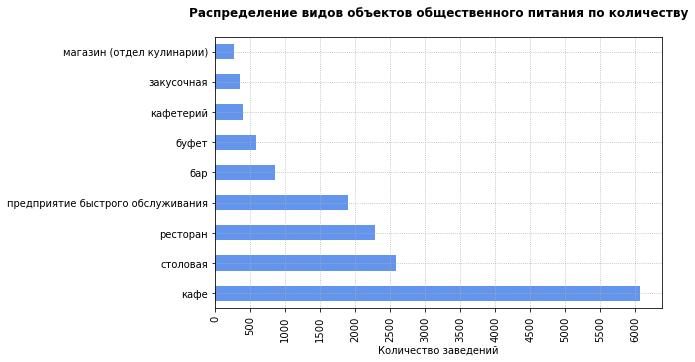

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))

ax = data['object_type'].value_counts().plot(kind='barh', color= '#6495ED')

ax.set_title('Распределение видов объектов общественного питания по количеству',
             fontsize = 12,  fontweight='bold', loc = 'center', pad = 20
            )

#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax.tick_params(axis='x', rotation=90)
ax.grid(linestyle = ':')

ax.set_xlabel('Количество заведений')
plt.show()

По графику мы видим, что больше всего заведений по типу -  кафе. Меньше всего - кафетериев, закусочных и отделов кулинарии в магазинах. Посмотрим, какую долю составляют заведения каждого типа. Построим круговую диаграмму.

In [16]:
# для удобства соберем нужные данные в отдельную табличку
object_type_pivot = data.pivot_table(index='object_type', values='id', aggfunc='count').sort_values(by='id', ascending=False).reset_index()
object_type_pivot

,object_type,id
0,кафе,6071
1,столовая,2584
2,ресторан,2282
3,предприятие быстрого обслуживания,1897
4,бар,855
5,буфет,576
6,кафетерий,395
7,закусочная,348
8,магазин (отдел кулинарии),273


In [17]:
# соберем малочисленные категории в общее значени other
other = object_type_pivot['id'].tail(5).sum()
other

2447

In [18]:
object_type_pivot = object_type_pivot.head(4).append({'object_type': 'остальные заведения', 'id': other}, ignore_index=True)
object_type_pivot

C:\Users\evges\AppData\Local\Temp\ipykernel_13884\123412411.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  object_type_pivot = object_type_pivot.head(4).append({'object_type': 'остальные заведения', 'id': other}, ignore_index=True)


,object_type,id
0,кафе,6071
1,столовая,2584
2,ресторан,2282
3,предприятие быстрого обслуживания,1897
4,остальные заведения,2447


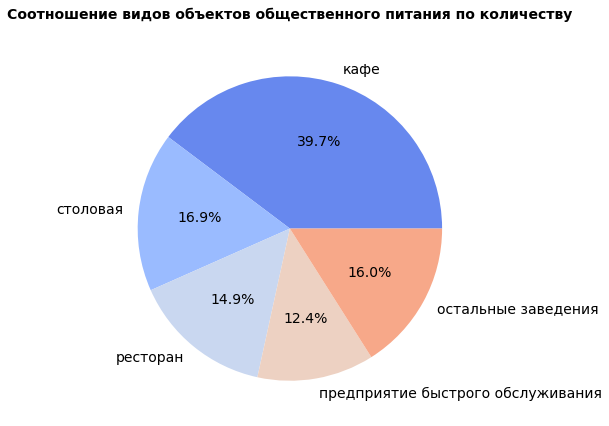

In [19]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title('Cоотношение видов объектов общественного питания по количеству',
             fontsize = 14,  fontweight='bold', loc = 'center', pad = 20
            )
ax.pie(object_type_pivot['id'],
       colors=sns.color_palette("coolwarm"),
       labels=object_type_pivot['object_type'],
       autopct='%1.1f%%',
       textprops={'fontsize': 14}
       )

plt.show()

По круговой диаграмме видно, что почти 40% заведений общепита - это кафе. Еще по 12-17% приходится на столовые, рестораны и предприятия быстрого обслуживания, и оставшиеся 16% - на все остальное.

<b><i>Исследуем соотношение сетевых и несетевых заведений по количеству. </b></i>

Выясним, для какого вида объекта общественного питания наиболее характерно сетевое распространение.

In [20]:
data.groupby('chain')['id'].count()

chain
False    12317
True      2964
Name: id, dtype: int64

In [21]:
object_type_chain_pivot =data.pivot_table(index=['object_type', 'chain'], 
                                         values='id', 
                                         aggfunc='count').reset_index()
object_type_chain_pivot

,object_type,chain,id
0,бар,False,818
1,бар,True,37
2,буфет,False,565
3,буфет,True,11
4,закусочная,False,292
5,закусочная,True,56
6,кафе,False,4675
7,кафе,True,1396
8,кафетерий,False,343
9,кафетерий,True,52


In [22]:
stats = data.groupby('object_type', as_index=False).agg({'id': 'count', 'chain': 'mean'})
stats['not_chain'] = 1 - stats['chain']
stats

,object_type,id,chain,not_chain
0,бар,855,0.043275,0.956725
1,буфет,576,0.019097,0.980903
2,закусочная,348,0.160920,0.839080
3,кафе,6071,0.229946,0.770054
4,кафетерий,395,0.131646,0.868354
5,магазин (отдел кулинарии),273,0.285714,0.714286
6,предприятие быстрого обслуживания,1897,0.415393,0.584607
7,ресторан,2282,0.237949,0.762051
8,столовая,2584,0.001161,0.998839


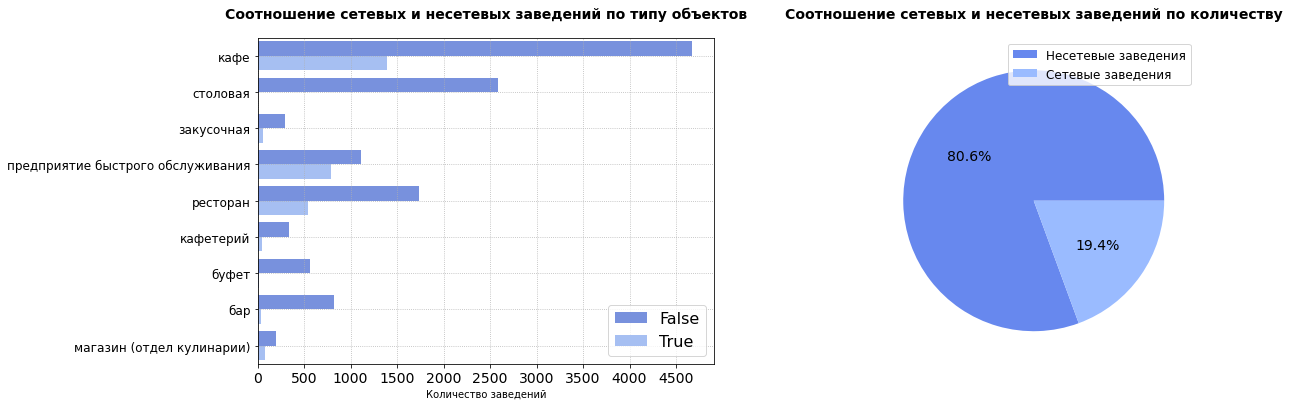

In [23]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(1,2,2)
ax2 = fig.add_subplot(1,2,1)

ax1.set_title('Cоотношение сетевых и несетевых заведений по количеству',
             fontsize = 14,  fontweight='bold', loc = 'center', pad = 20
            )
ax1.pie(data.groupby('chain')['id'].count(),
       colors=sns.color_palette("coolwarm"),
       autopct='%1.1f%%',
       textprops={'fontsize': 14}
       )
ax1.legend(['Несетевые заведения', 'Сетевые заведения'],
           loc='best',
           prop={'size': 12}           
          )


ax2.set_title('Cоотношение сетевых и несетевых заведений по типу объектов',
             fontsize = 14,  fontweight='bold', loc = 'center', pad = 20
            )
ax2 = sns.barplot(y='object_type', 
                  x='id', 
                  data=data,
                  estimator=len,
                  hue='chain',
                  palette=sns.color_palette("coolwarm")
                                   
                 )
ax2.set_ylabel('')
ax2.set_xlabel('Количество заведений')
#  Устанавливаем интервал основных делений:
ax2.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.legend(prop={'size': 16})
ax2.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=14)
ax2.grid(linestyle = ':')
plt.show()

По круговой диаграмме видно, что более 80% заведений - несетевые. В разбивке по типам объектов можно заметить, что сетевые заведения чаще всего бывают кафе, ресторанами или предприятиями быстрого обслуживания. В то же время в остальных категориях общепита сетевые объекты встречаются лишь в единичных случаях.

Дополнительно <b><i>исследуем сетевые заведения</b></i> и попробуем ответить на вопрос, что для них более характерно: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест? 

In [24]:
# Построим сводную таблицу по сетям с количеством заведений и средним числом мест
chain_true_pivot = data[data['chain']].pivot_table(index='object_name', 
                                values= 'number', 
                                aggfunc=['count', 'mean']).reset_index()
chain_true_pivot.columns=['Название сети','Количество заведений','Среднее число мест']
chain_true_pivot.head()

,Название сети,Количество заведений,Среднее число мест
0,Beverly hills diner,1,88.000000
1,Bierloga,1,75.000000
2,Black & white,1,40.000000
3,Bocconcino,3,66.666667
4,Boobo,1,46.000000


In [25]:
chain_true_pivot[chain_true_pivot['Количество заведений'] == 1].shape[0], chain_true_pivot.shape[0]

(304, 553)

Больше половины заведений, отмеченных как сетевые имеют всего по одному заведению в сети. Возможно, остальные их объекты не попали в нашу базу, т.к расположены в других городах, или находятся на стадии открытия. В любом случае, этот момент следует учесть в дальнейшем анализе.

In [26]:
#chain_true_pivot = chain_true_pivot[chain_true_pivot['Количество заведений'] > 1]

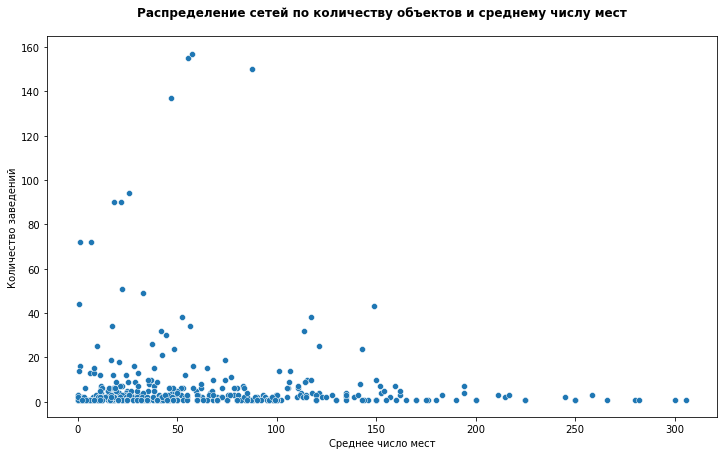

In [27]:
fig, ax = plt.subplots(figsize=(12, 7))

ax = sns.scatterplot(data=chain_true_pivot,
                     x='Среднее число мест',
                     y='Количество заведений',
                     palette=sns.color_palette("coolwarm"),
                     
                    )
ax.set_title('Распределение сетей по количеству объектов и среднему числу мест',
             fontsize = 12,  fontweight='bold', loc = 'center', pad = 20
            )
plt.show()

По графику видно, что большинство сетей имеют до 20 объектов и до 150 посадочных мест. Попробуем разобраться сколько в цифрах - много/мало объектов, много/мало мест. Для этого рассчитаем медианные значения по столбцам. Однако, мы помним, что больше половины сетей в таблице имеют по 1 объекту - исключим их из расчетов.

In [28]:
chain_true_pivot[chain_true_pivot['Количество заведений'] > 1].median(), chain_true_pivot['Среднее число мест'].median()

C:\Users\evges\AppData\Local\Temp\ipykernel_13884\1997390887.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  chain_true_pivot[chain_true_pivot['Количество заведений'] > 1].median(), chain_true_pivot['Среднее число мест'].median()


(Количество заведений     4.0
 Среднее число мест      44.0
 dtype: float64,
 44.56666666666667)

Примем медианные значения за границы разделения на мало и много и добавим в сводную таблицу столбец с соответствующей категорией каждой сети. Затем отразим эти изменения на графике.

In [29]:
def func(row):
    res = ''
    if row['Количество заведений'] < 4:
        res += 'Мало заведений, '
    else:
        res += 'Много заведений, '
    if row['Среднее число мест'] < 44: 
        res += 'мало мест'
    else:
        res += 'много мест'
    
    return res

In [30]:
chain_true_pivot['Категория'] = chain_true_pivot.apply(func,  axis=1) 
chain_true_pivot.head()

,Название сети,Количество заведений,Среднее число мест,Категория
0,Beverly hills diner,1,88.000000,"Мало заведений, много мест"
1,Bierloga,1,75.000000,"Мало заведений, много мест"
2,Black & white,1,40.000000,"Мало заведений, мало мест"
3,Bocconcino,3,66.666667,"Мало заведений, много мест"
4,Boobo,1,46.000000,"Мало заведений, много мест"


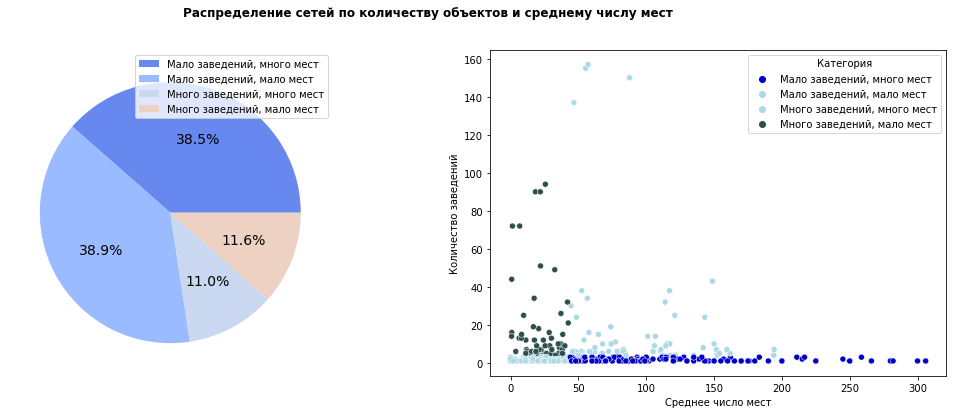

In [31]:
fig = plt.figure(figsize=(18, 6))
fig.suptitle('Распределение сетей по количеству объектов и среднему числу мест',
             fontsize = 12,  fontweight='bold'
            )

ax2 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

ax1 = sns.scatterplot(data=chain_true_pivot,
                     x='Среднее число мест',
                     y='Количество заведений',
                     palette= {'Мало заведений, много мест':'#0000CD',
                               'Мало заведений, мало мест':'#ADD8E6',
                               'Много заведений, много мест':'#ADD8E6',
                               'Много заведений, мало мест': '#2F4F4F'},
                     hue='Категория'
                
                    
                    )

ax2.pie(chain_true_pivot.groupby('Категория')['Название сети'].count(),
       colors=sns.color_palette("coolwarm"),
       autopct='%1.1f%%',
       textprops={'fontsize': 14}        
       )

ax2.legend(chain_true_pivot['Категория'].unique())
plt.show()

По круговой диаграмме хорошо видно, что сетей в категории "Мало заведений, много мест" гораздо больше, чем "Много заведений, мало мест". Кроме того, характеристика "Мало заведений, мало мест" тоже является довольно характерной для сетевых общепитов.

Для каждого вида объекта общественного питания <i><b>опишем среднее количество посадочных мест</i></b> и выясним, какой тип заведений предоставляет в среднем самое большое количество посадочных мест.

In [32]:
data.groupby('object_type')['number'].mean()

object_type
бар                                   43.533333
буфет                                 51.425347
закусочная                             7.847701
кафе                                  39.785703
кафетерий                              9.184810
магазин (отдел кулинарии)              5.589744
предприятие быстрого обслуживания     20.808645
ресторан                              96.884750
столовая                             130.337848
Name: number, dtype: float64

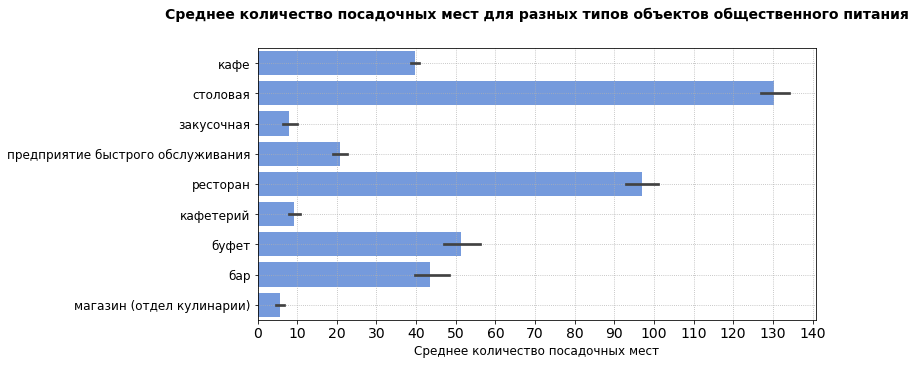

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Среднее количество посадочных мест для разных типов объектов общественного питания',
             fontsize = 14,  fontweight='bold', loc = 'center', pad = 30
            )
ax = sns.barplot(y='object_type', 
                  x='number', 
                  data=data,
                  estimator=np.mean,
                  palette= ['#6495ED']
                                   
                 )
ax.set_ylabel('')
ax.set_xlabel('Среднее количество посадочных мест', fontsize = 12)
#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=14)
ax.grid(linestyle = ':')
plt.show()

По столбчатой диаграмме видно, что больше всего посадочных мест бывает в столовых и ресторанах - в эту категорию попали столовые при школах и других гос.учреждениях. Меньше всего - в отделах кулинарии в магазинах или в закусочных. Тут тоже все логично, люди берут еду с собой. Для самой распространной категории общепита - кафе - среднее количество посадочных мест - около 40.

Выделим в отдельный столбец информацию об улице из столбца address. Автоматизируем этот процесс при помощи функции парсинга.

In [34]:
data['street'] = data['address'].apply(lambda x: x.split(', ')[1])
data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,Сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48.0,улица Егора Абакумова
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35.0,улица Талалихина
2,24309,Кафе академия,False,кафе,"город Москва, Абельмановская улица, дом 6",95.0,Абельмановская улица
3,21894,Пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40.0,Абрамцевская улица
4,119365,Кафе вишневая метель,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50.0,Абрамцевская улица


Построим график <i><b>топ-10 улиц по количеству объектов общественного питания</i></b>. 

In [35]:
top_10_streets = data.pivot_table(index='street', 
                                  values='id', 
                                  aggfunc='count').reset_index().sort_values(by='id', ascending=False)
top_10_streets.head(10)

,street,id
1334,город Зеленоград,232
1452,проспект Мира,203
993,Профсоюзная улица,181
683,Ленинградский проспект,170
979,Пресненская набережная,167
407,Варшавское шоссе,161
686,Ленинский проспект,147
1419,поселение Сосенское,137
1449,проспект Вернадского,128
674,Кутузовский проспект,114


In [36]:
data[data['street'] == 'город Зеленоград'].head()

,id,object_name,chain,object_type,address,number,street
1386,22331,Столовая миэт,False,столовая,"город Москва, город Зеленоград, улица Юности, ...",56.0,город Зеленоград
1405,20199,Это,False,кафе,"город Москва, город Зеленоград, корпус 401",35.0,город Зеленоград
1406,68113,Френдс,False,кафе,"город Москва, город Зеленоград, корпус 435",34.0,город Зеленоград
1407,20105,Кафе граф монте-кристо,False,кафе,"город Москва, город Зеленоград, корпус 436",40.0,город Зеленоград
1408,22982,Альфорно,False,кафе,"город Москва, город Зеленоград, корпус 438",49.0,город Зеленоград


В результате парсинга в таблицу ошибочно попал город Зеленоград. Исключим его из таблицы и построим график топ-10 улиц 

In [37]:
top_10_streets = top_10_streets[top_10_streets['street'] != 'город Зеленоград'].head(10)
top_10_streets

,street,id
1452,проспект Мира,203
993,Профсоюзная улица,181
683,Ленинградский проспект,170
979,Пресненская набережная,167
407,Варшавское шоссе,161
686,Ленинский проспект,147
1419,поселение Сосенское,137
1449,проспект Вернадского,128
674,Кутузовский проспект,114
600,Каширское шоссе,111


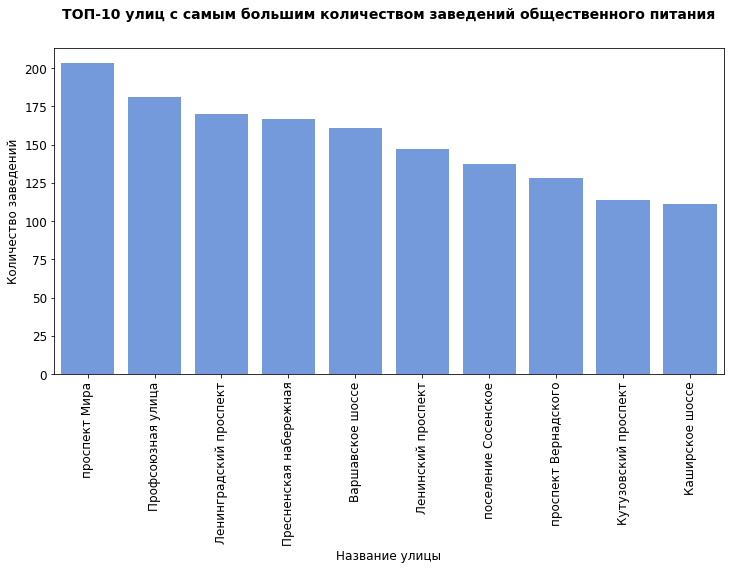

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('ТОП-10 улиц с самым большим количеством заведений общественного питания',
             fontsize = 14,  fontweight='bold', loc = 'center', pad = 30
            )
ax = sns.barplot(x='street', 
                  y='id', 
                  data=top_10_streets,
                  palette= ['#6495ED']
                                   
                 )
ax.set_ylabel('Количество заведений', fontsize = 12)
ax.set_xlabel('Название улицы', fontsize = 12)

ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12, rotation=90)

plt.show()

Воспользуемся внешней информацией и ответим на вопрос — <b><i>в каких районах Москвы находятся эти улицы?</b></i> Загрузим датасет с платными парковками с Портала открытых данных правительства Москвы. В этом датасете найдем необходимую информацию по соответствию улиц и районов.

In [39]:
spreadsheet_id = '1jIZegksBfczOkYFNg3DEtXmheshCY58iUJ4L1x3OswI'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.head()

,ID,ParkingName,ParkingZoneNumber,global_id,AdmArea,District,Address,CarCapacity,CarCapacityDisabled,Tariffs,Longitude_WGS84,Latitude_WGS84,Coordinates,geodata_center,geoarea
0,Локальный идентификатор,Наименование парковки,Номер парковочной зоны,global_id,Административный округ,Район,Адрес,Общее количество парковочных мест,Количество парковочных мест для инвалидов,Тарифы,Долгота в WGS-84,Широта в WGS-84,Координаты линии,geodata_center,geoarea
1,15906,Парковка №0302 (2),0302,1032914612,Центральный административный округ,район Арбат,"город Москва, улица Арбат, дом 54/2, строение 1",5,5,TariffType:дифференцированный тариф\nTimeRange...,37.583607,55.747075,"55.746957,37.583203|55.747193,37.584011","{""coordinates"":[37.584011,55.747193],""type"":""P...",NaN
2,15908,Парковка №0302 (3),0302,1032914613,Центральный административный округ,район Арбат,"город Москва, улица Арбат, дом 54/2, строение 2",43,0,TariffType:дифференцированный тариф\nTimeRange...,37.58390300000001,55.7470695,"55.746827,37.583077|55.747312,37.584729","{""coordinates"":[37.584729,55.747312],""type"":""P...",NaN
3,15918,Парковка №0302 (4),0302,1032914614,Центральный административный округ,район Арбат,"город Москва, Большой Николопесковский переуло...",2,0,TariffType:дифференцированный тариф\nTimeRange...,37.590497,55.751013,"55.751004,37.59043|55.751022,37.590564","{""coordinates"":[37.59043,55.751004],""type"":""Po...",NaN
4,15919,Парковка №0302 (5),0302,1032914616,Центральный административный округ,район Арбат,"город Москва, Малый Николопесковский переулок,...",8,1,TariffType:дифференцированный тариф\nTimeRange...,37.591532,55.751147,"55.751103,37.591159|55.751191,37.591905","{""coordinates"":[37.591905,55.751191],""type"":""P...",NaN


In [40]:
# оставим в датасете только необходимую информацию об адресах и районах
df = df[['District', 'Address']]
# приведем названия столбцов к формату snake_case
df.columns = ['distinct', 'address']
# выделим улицы в отдельный столбец
df['street'] = data['address'].apply(lambda x: x.split(', ')[1])
df.head()        

,distinct,address,street
0,Район,Адрес,улица Егора Абакумова
1,район Арбат,"город Москва, улица Арбат, дом 54/2, строение 1",улица Талалихина
2,район Арбат,"город Москва, улица Арбат, дом 54/2, строение 2",Абельмановская улица
3,район Арбат,"город Москва, Большой Николопесковский переуло...",Абрамцевская улица
4,район Арбат,"город Москва, Малый Николопесковский переулок,...",Абрамцевская улица


In [41]:
# оставим в датасете только необходимую информацию об улицах и районах и удалим дубликаты
df = df[['distinct', 'street']].drop_duplicates()
df.head()

,distinct,street
0,Район,улица Егора Абакумова
1,район Арбат,улица Талалихина
2,район Арбат,Абельмановская улица
3,район Арбат,Абрамцевская улица
6,район Арбат,переулок Сивцев Вражек


In [42]:
#добавим столбец с районом в таблицу top_10_streets
top_10_streets = top_10_streets.merge(df[['distinct', 'street']], on='street', how='left')
top_10_streets.head()

,street,id,distinct
0,проспект Мира,203,Пресненский район
1,проспект Мира,203,Тверской район
2,проспект Мира,203,Таганский район
3,проспект Мира,203,район Чертаново Центральное
4,проспект Мира,203,район Черёмушки


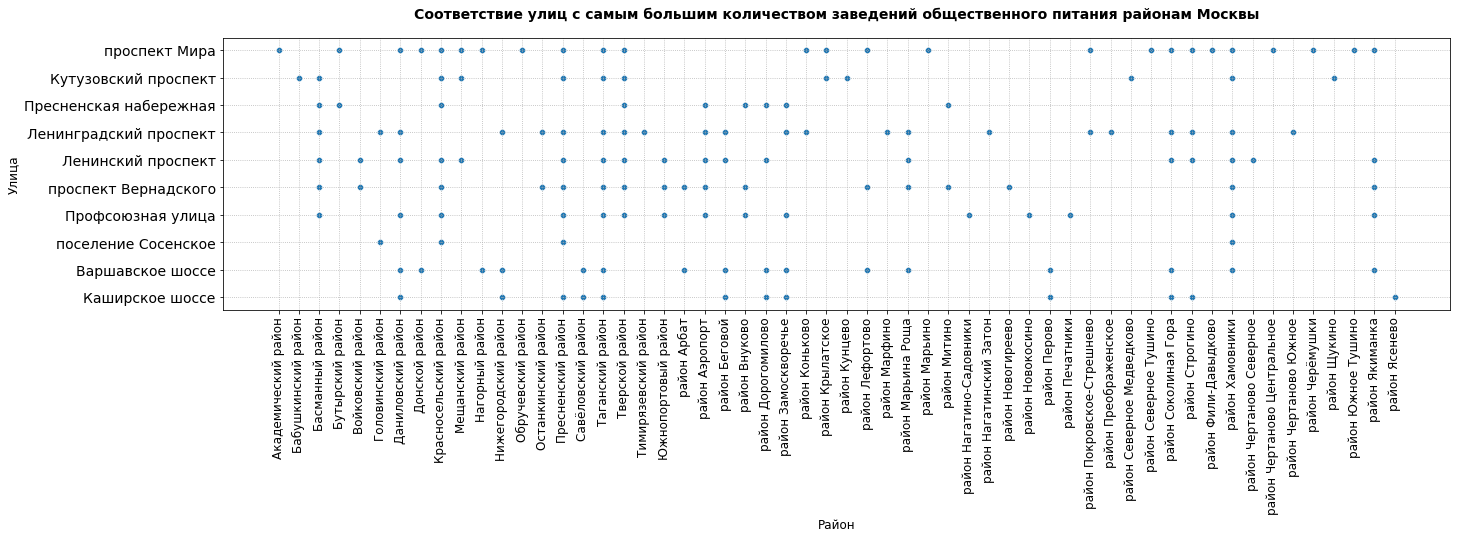

In [43]:
fig, ax = plt.subplots(figsize=(22, 5))
ax.set_title('Соответствие улиц с самым большим количеством заведений общественного питания районам Москвы',
             fontsize = 14,  fontweight='bold', loc = 'center', pad = 20
            )
ax = sns.scatterplot(y='street', 
                  x='distinct', 
                  data=top_10_streets.sort_values(by='distinct'),
                  palette= ['#6495ED']
                                   
                 )
ax.set_xlabel('Район', fontsize = 12)
ax.set_ylabel('Улица', fontsize = 12)

ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=12, rotation=90)
ax.grid(linestyle = ':')

plt.show()

Из полученного графика любопытный читатель сможет узнать, через какие районы Москвы проходят 10 улиц с самым большим количеством заведений общепита :) Популярность этих улиц объясняется тем, что они довольно длинные, и, соответственно, на них может разместиться больше заведений, чем на коротких улицах.

Найдем число <b><i>улиц с всего одним объектом общественного питания</b></i>. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

In [44]:
one_object_streets = data.pivot_table(index='street', 
                                  values='id', 
                                  aggfunc='count').reset_index().sort_values(by='id', ascending=False)
one_object_streets = one_object_streets[one_object_streets['id'] == 1]
one_object_streets

,street,id
1586,улица Демьяна Бедного,1
259,Андреево-Забелинская улица,1
35,1-й Саратовский проезд,1
260,Андроньевская площадь,1
113,2-й Стрелецкий проезд,1
...,...,...
1343,дом 1,1
1345,дом 10,1
1346,дом 11,1
1347,дом 118Б,1


In [45]:
one_object_streets['street'].unique()

array(['улица Демьяна Бедного', 'Андреево-Забелинская улица',
       '1-й Саратовский проезд', 'Андроньевская площадь',
       '2-й Стрелецкий проезд', '1-й Рижский переулок',
       '1-й Обыденский переулок', 'Богоявленский переулок',
       'улица Паперника', '3-й Дорожный проезд', 'Анненская улица',
       'улица Немчинова', '1-й Новокузнецкий переулок',
       '1-й Сельскохозяйственный проезд', '1-й Николощеповский переулок',
       '26-й километр Московской Кольцевой Автодороги',
       'улица Девятая Рота', 'Анненский проезд', '2-я улица Энтузиастов',
       '2-й Хуторской переулок', 'улица Новая Дорога',
       'Армавирская улица', '3-й Кадашёвский переулок', 'улица Шумилова',
       '1-й Сетуньский проезд', '1-й Басманный переулок',
       'улица Жебрунова', '1-й проезд Марьиной Рощи',
       '1-й Тушинский проезд', 'улица Екатерины Будановой',
       '3-й Лучевой просек', 'шоссе Фрезер',
       '1-й Спасоналивковский переулок', '1-й Балтийский переулок',
       '3-й Лихачёвски

При внимательном рассмотрении полученной таблицы снова увидим ошибки парсинга. В некоторых адресах не были указаны улицы, а только номера домов - эти значения тоже попали в таблицу. Отсеим их. 

In [46]:
# напишем функцию, которая будет принимать строку и искать в ней наименование типов улиц, 
# и если их нет, возвращать строку error
def street_names_func(street_name):
    flag = False
    street_types_dict = ['улица', 'переулок', 'бульвар', 'проезд', 'площадь', 'шоссе', 'просек', 'тупик', 'проспект', 'набережная' ]
    for i in street_types_dict:
        if street_name.find(i) != -1:
            flag = True
    if flag:
        res = street_name
    else:
        res = 'error'
    return res

In [47]:
one_object_streets['street'] = one_object_streets['street'].apply(street_names_func)
one_object_streets = one_object_streets[one_object_streets['street'] != 'error']
one_object_streets

,street,id
1586,улица Демьяна Бедного,1
259,Андреево-Забелинская улица,1
35,1-й Саратовский проезд,1
260,Андроньевская площадь,1
113,2-й Стрелецкий проезд,1
...,...,...
529,Есенинский бульвар,1
524,Елоховский проезд,1
522,Егорьевский проезд,1
505,Докучаев переулок,1


Итак, мы получили 521 улицу с всего 1 объектом общепита. Вероятно, конкурентность на таких улицах меньше - у голодных клиентов просто нет альтернатив:) Посмотрим, в каких районах находятся эти улицы

In [48]:
one_object_streets = one_object_streets.merge(df[['distinct', 'street']], on='street', how='left')
one_object_streets.head()

,street,id,distinct
0,улица Демьяна Бедного,1,район Арбат
1,Андреево-Забелинская улица,1,Донской район
2,1-й Саратовский проезд,1,район Перово
3,Андроньевская площадь,1,район Преображенское
4,2-й Стрелецкий проезд,1,район Замоскворечье


In [49]:
one_object_streets.pivot_table(index='distinct',
                              values='street',
                              aggfunc='count').reset_index()

,distinct,street
0,Академический район,9
1,Алексеевский район,1
2,Басманный район,28
3,Бутырский район,5
4,Войковский район,5
...,...,...
57,район Чертаново Центральное,10
58,район Черёмушки,2
59,район Щукино,6
60,район Южное Тушино,2


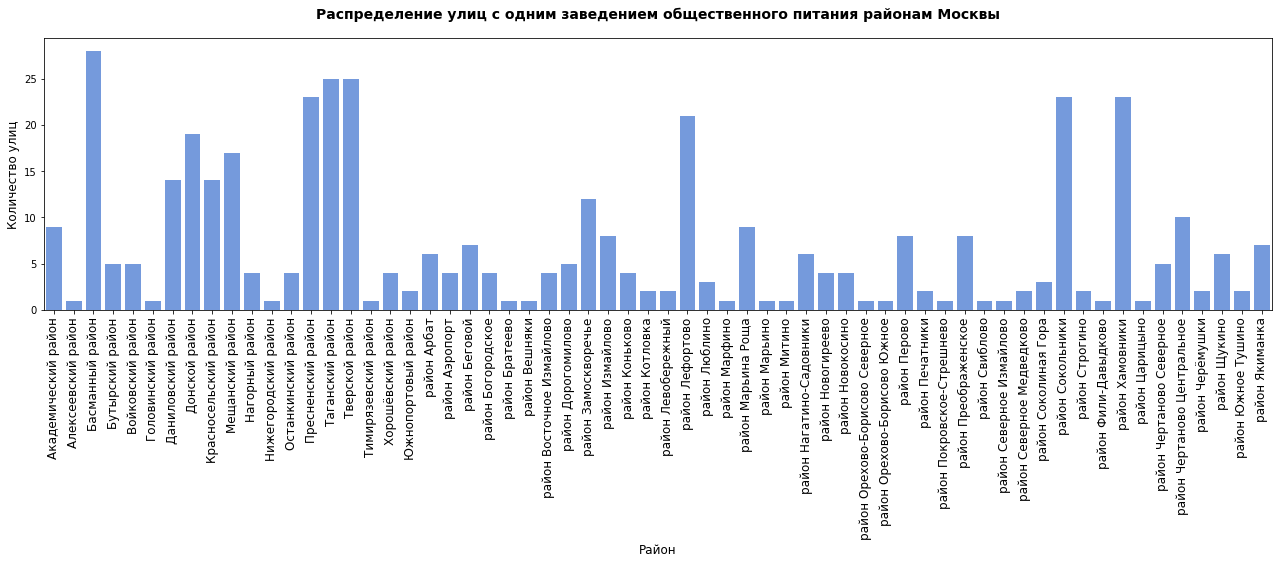

In [50]:
fig, ax = plt.subplots(figsize=(22, 5))
ax.set_title('Распределение улиц с одним заведением общественного питания районам Москвы',
             fontsize = 14,  fontweight='bold', loc = 'center', pad = 20
            )
ax = sns.barplot(x='distinct',
                     y='street',
                  data=one_object_streets.pivot_table(index='distinct',
                              values='street',
                              aggfunc='count').reset_index(),
                  palette= ['#6495ED'],
                                                   
                 )
ax.set_xlabel('Район', fontsize = 12)
ax.set_ylabel('Количество улиц', fontsize = 12)

ax.tick_params(axis='x', labelsize=12, rotation=90)

plt.show()

По полученной столбчатой диаграмме видно, как распределены улицы с всего одним заведением по районам Москвы. Большая их часть распологается в центральных районах города. Однако такой график мало что может нам рассказать о том, насколько переспективны эти районы как потенциальное место расположения кафе. Попробуем отразить на этом же графике распределение улиц с большим количеством заведений.

In [51]:
# выделим 300 улиц с самым большим количеством объектов
many_object_streets = data.pivot_table(index='street', 
                                  values='id', 
                                  aggfunc='count').reset_index().sort_values(by='id', ascending=False).head(250)
many_object_streets

,street,id
1334,город Зеленоград,232
1452,проспект Мира,203
993,Профсоюзная улица,181
683,Ленинградский проспект,170
979,Пресненская набережная,167
...,...,...
369,Большой Саввинский переулок,14
1529,улица Бутлерова,14
1068,Сигнальный проезд,14
696,Липецкая улица,14


In [52]:
# применим к полученной таблице ранее написанную функцию устранения ошибок парсинга
many_object_streets['street'] = many_object_streets['street'].apply(street_names_func)
many_object_streets = many_object_streets[many_object_streets['street'] != 'error']
many_object_streets

,street,id
1452,проспект Мира,203
993,Профсоюзная улица,181
683,Ленинградский проспект,170
979,Пресненская набережная,167
407,Варшавское шоссе,161
...,...,...
369,Большой Саввинский переулок,14
1529,улица Бутлерова,14
1068,Сигнальный проезд,14
696,Липецкая улица,14


In [53]:
# добавим названия районов
many_object_streets = many_object_streets.merge(df[['distinct', 'street']], on='street', how='left')
many_object_streets.head()

,street,id,distinct
0,проспект Мира,203,Пресненский район
1,проспект Мира,203,Тверской район
2,проспект Мира,203,Таганский район
3,проспект Мира,203,район Чертаново Центральное
4,проспект Мира,203,район Черёмушки


In [54]:
#  соберем сводную таблицу. В столбец flag поместим логическое значение :
# True - улицы с большим количеством заведений, False - улицы с 1 заведением
# этот столбец нам понадобится при построении графика
distinct_pivot = many_object_streets.pivot_table(index='distinct',
                              values='street',
                              aggfunc='count').reset_index()
distinct_pivot['flag'] = True 
distinct_pivot

,distinct,street,flag
0,Академический район,7,True
1,Алексеевский район,4,True
2,Алтуфьевский район,1,True
3,Бабушкинский район,2,True
4,Басманный район,94,True
...,...,...,...
81,район Черёмушки,8,True
82,район Щукино,4,True
83,район Южное Тушино,9,True
84,район Якиманка,40,True


In [55]:
# проведем все те же манипуляции для улиц с 1 объектом
temp = one_object_streets.pivot_table(index='distinct',
                               values='street',
                               aggfunc='count').reset_index()
temp['flag'] = False
temp

,distinct,street,flag
0,Академический район,9,False
1,Алексеевский район,1,False
2,Басманный район,28,False
3,Бутырский район,5,False
4,Войковский район,5,False
...,...,...,...
57,район Чертаново Центральное,10,False
58,район Черёмушки,2,False
59,район Щукино,6,False
60,район Южное Тушино,2,False


In [56]:
# соберем общую сводную таблицу
distinct_pivot = pd.concat([distinct_pivot, temp], ignore_index=True)
distinct_pivot.sort_values(by='distinct')

,distinct,street,flag
0,Академический район,7,True
86,Академический район,9,False
1,Алексеевский район,4,True
87,Алексеевский район,1,False
2,Алтуфьевский район,1,True
...,...,...,...
146,район Южное Тушино,2,False
83,район Южное Тушино,9,True
84,район Якиманка,40,True
147,район Якиманка,7,False


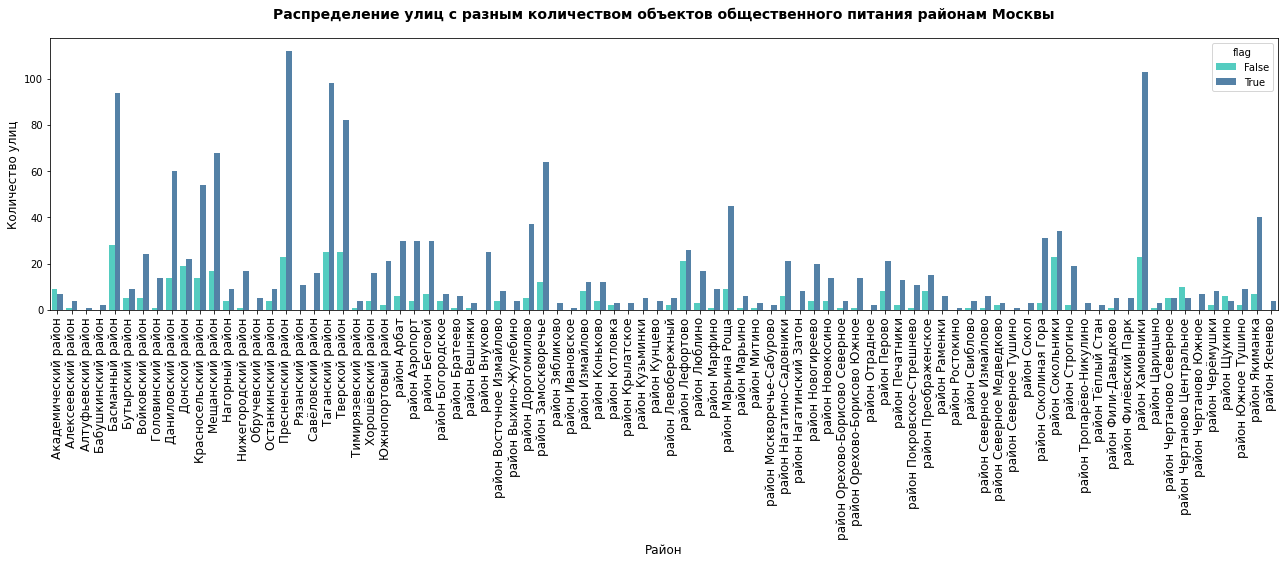

In [57]:
fig, ax = plt.subplots(figsize=(22, 5))
ax.set_title('Распределение улиц с разным количеством объектов общественного питания районам Москвы',
             fontsize = 14,  fontweight='bold', loc = 'center', pad = 20
            )
ax = sns.barplot(x='distinct',
                 y='street',
                 hue='flag',
                 data=distinct_pivot,
                 palette= ['#40E0D0', '#4682B4']                                                   
                 )
ax.set_xlabel('Район', fontsize = 12)
ax.set_ylabel('Количество улиц', fontsize = 12)

ax.tick_params(axis='x', labelsize=12, rotation=90)

plt.show()

Полученный график выглядит довольно тяжелым для восприятия: нужно присмотреться, чтобы понять что в нем происходит. Однако, если все же это сделать, можно заметить некоторые закономерности, которые могут стать хорошей почвой для дальнейшего более детального исследования в поиске максимально удачного места для нового заведения. 

Так, например, мы можем заметить, что есть районы, где сосредоточено очень много улиц с большим количеством заведений и мало улиц с 1 заведением (Басманский, Пресненский, Таганский, Тверской, Хамовники). Это означает, что эти районы имеют достаточную проходимость, а значит потенциально прибыльны. Но с другой стороны, и конкурентность в них значительно выше. Возможно, имеет смысл рассматривать улицы с 1 заведением общепита в этом районе, как потенциальные места для открытия нового заведения, ведь на этих улицах мы имеем совокупность факторов: "проходимый район" + "меньше конкурентов на одной улице". 

Однако, эти районы находятся в самом центре Москвы - открытие заведения там будет стоить очень дорого. С точки зрения "удешевления" проекта, можно рассмотреть районы немного смещенные от центра. Хорошими вариантами могут быть - Даниловский, Аэропорт, Беговой, Дорогомилово, Марьина Роща, Соколиная гора, Сокольники.

Разумеется, далее следует более детально изучить расположение и специфику перечисленных районов, и только после этого принимать решение об открытии новой точки общепита.

## Вывод

Концепция кафе с роботами-официантами выглядит весьма необычной и многообещающей. Для успешной ее реализации следует принять во внимание основные тенденции в сфере общепита на сегодняшний день, и тогда это может принести хороший результат.

1. Выбор открытия именно кафе, а не другого типа заведения, очень хорош. На рынке предприятий общественного питания 40% объектов - как раз кафе. Они успешно работают, а значит, клиенты охотно туда приходят.
2. Согласно исследованию, оптимальное количество посадочных мест в кафе - около 40. 
3. Если рассматривается вариант об открытии сети заведений, стоит начать с развития небольшого количества филиалов (1-3). Как показывает практика, такие небольшие сети более распространены, а значит, они лучше удерживаются на рынке.
4. В качестве места для нового кафе следует искать район, где проходимость клиентов как можно больше, а конкурентность - как можно меньше. Тут можно обратить внимание на районы: Басманский, Пресненский, Таганский, Тверской, Хамовники. Это центральные районы, в них всегда большая проходимость клиентов, однако, согласно исследованию, в них есть улицы с совсем небольшим числом заведений, а значит, конкурентность на таких улицах ниже - и они могут быть перспективными.
5. Если открытие заведения в самом сердце Москвы пока финансово не осуществимо, можно обратить внимание на чуть более отдаленные районы - Даниловский, Аэропорт, Беговой, Дорогомилово, Марьина Роща, Соколиная гора, Сокольники. Эти районы тоже достаточно проходимы и там тоже есть улицы с меньшей конкуренцией, которые могут быть потенциально интересны.



Презентация для инвесторов, которая расскажет о текущем положении дел на рынке общепита:
<https://drive.google.com/file/d/12br0Z0hq4IYVyi3mJuaG_HYmkHJ7h4se/view?usp=sharing>